<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/Easy_Network_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - First Fully connected network with Keras

Author: Umberto Michelucci (umberto.michelucci@toelt.ai)

## Exercises

### Exercise 1:
Try to increase the network size (increasing the number of layers and number of neurons) and see if you get better results.

### Exercise 2:
Try to reduce the network size to just one neuron. What kind of neuron do you need to use (activation function, output, etc.) to classify the images? And what results do you get?

### Exercise 3:
Check for overfitting. Is the network overfitting? Can you tell?

In [50]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

import matplotlib.pyplot as plt

In [53]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
#x_train, x_test = x_train * 255.0, x_test * 255.0

In [54]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Text(0.5, 1.0, 'Label is 3')

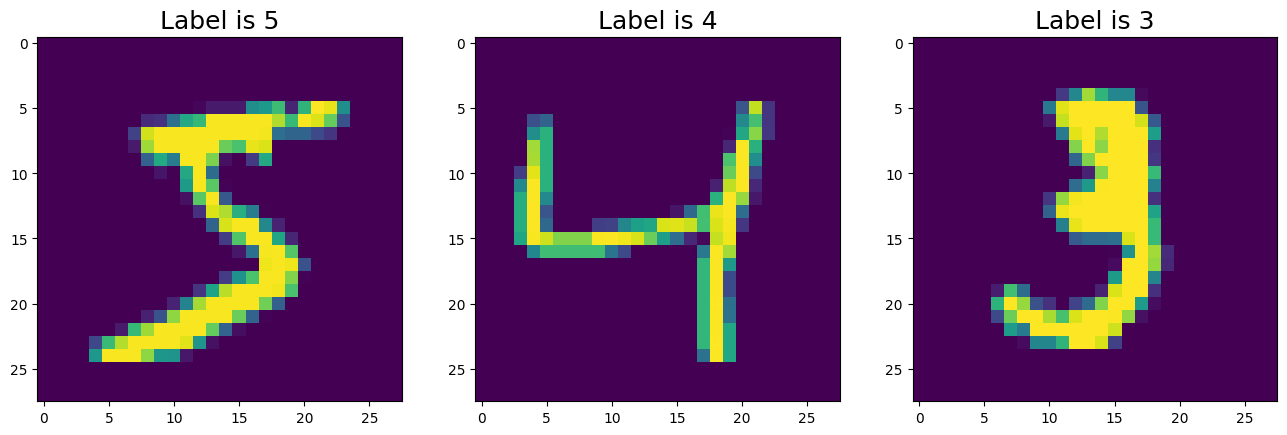

In [55]:
fig = plt.figure(figsize = (16,5))
fig.add_subplot(1,3,1)
plt.imshow(x_train[0])
plt.title("Label is "+ str(y_train[0]), fontsize = 18)
fig.add_subplot(1,3,2)
plt.imshow(x_train[2])
plt.title("Label is "+ str(y_train[2]), fontsize = 18)
fig.add_subplot(1,3,3)
plt.imshow(x_train[10])
plt.title("Label is "+ str(y_train[10]), fontsize = 18)

## Sequential model

In [82]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
history = model.fit(x_train, y_train, batch_size = 256, epochs=30, verbose = 1, validation_data=(x_test, y_test))
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6176 - loss: 1.1339 - val_accuracy: 0.9493 - val_loss: 0.1796
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8962 - loss: 0.3588 - val_accuracy: 0.9636 - val_loss: 0.1242
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9189 - loss: 0.2757 - val_accuracy: 0.9723 - val_loss: 0.1085
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9344 - loss: 0.2254 - val_accuracy: 0.9725 - val_loss: 0.0998
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9405 - loss: 0.2028 - val_accuracy: 0.9758 - val_loss: 0.0920
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9468 - loss: 0.1752 - val_accuracy: 0.9758 - val_loss: 0.0930
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9508 - loss: 0.1662 - val_accuracy: 0.9781 - val_loss: 0.0881
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9547 - loss: 0.1498 - val_accuracy: 0.

[0.09722446650266647, 0.9843999743461609]

In [7]:
print(history.history)

{'accuracy': [0.2420666664838791, 0.4421333372592926, 0.5532333254814148, 0.6011499762535095, 0.6438500285148621, 0.671583354473114, 0.6869833469390869, 0.7009333372116089, 0.710349977016449, 0.7171333432197571], 'loss': [1.9991965293884277, 1.5468415021896362, 1.2649250030517578, 1.1042662858963013, 1.0078771114349365, 0.9227805733680725, 0.8748323321342468, 0.8427032828330994, 0.8169830441474915, 0.7957587838172913], 'val_accuracy': [0.37689998745918274, 0.503000020980835, 0.5738000273704529, 0.6062999963760376, 0.654699981212616, 0.6812000274658203, 0.6960999965667725, 0.7006000280380249, 0.713699996471405, 0.7149999737739563], 'val_loss': [1.7120951414108276, 1.4033210277557373, 1.1780140399932861, 1.07588529586792, 0.9786644577980042, 0.9128557443618774, 0.8767707943916321, 0.8519592881202698, 0.8305701017379761, 0.8205069303512573]}


Let's check how the network is learning by plotting the loss function for the training and test datasets. This is a handy way to check if there is any overfitting or if the network is not learning properly.

### Learning Assessment

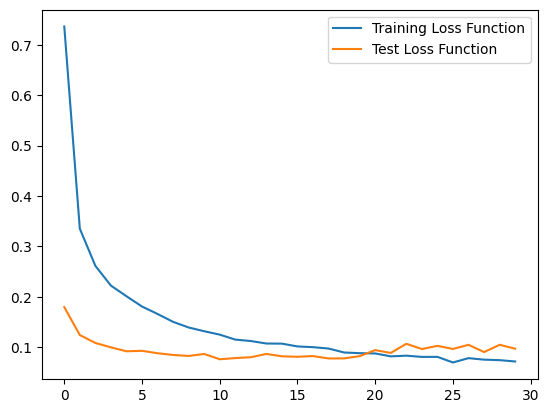

In [84]:
plt.plot(history.history['loss'], label = 'Training Loss Function')
plt.plot(history.history['val_loss'], label = 'Test Loss Function')
plt.legend()
plt.show()

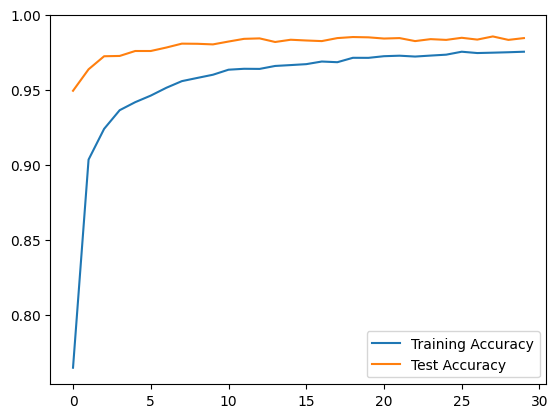

In [85]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.ylim(None, 1)
plt.legend()
plt.show()

### Prediction check

In [10]:
model.predict(x_train[0][np.newaxis,:])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([3.4616567e-02, 4.7676316e-03, 3.4835439e-02, 2.2694331e-01,
       6.0148106e-04, 3.4078640e-01, 6.1038462e-03, 2.7983564e-05,
       3.4883121e-01, 2.4860918e-03], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


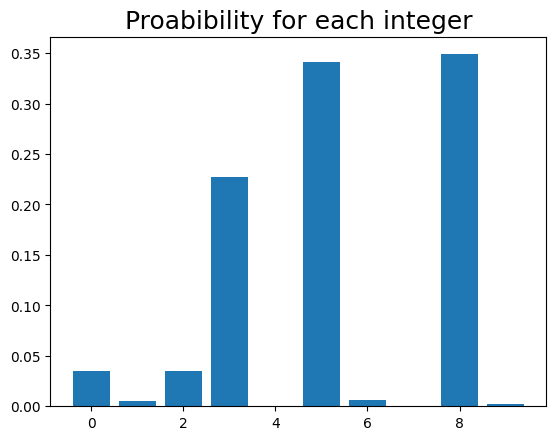

In [11]:
plt.bar(np.arange(0,10,1), model.predict(x_train[0][np.newaxis,:])[0])
plt.title ("Proabibility for each integer", fontsize = 18)
plt.show()

## Functional APIs

Networks can be built with the Sequential approach by using the ```Sequential()``` constructor, or by using functional API, as shown below. The functional API will give much more flexibility to build more flexible network architectures.

In [12]:
input = tf.keras.layers.Input(shape = (28,28), name = 'Input_Layer')
layer = tf.keras.layers.Flatten()(input)
layer = tf.keras.layers.Dense(128, activation='relu')(layer)
#layer = tf.keras.layers.Dropout(0.2)(layer)
layer = tf.keras.layers.Dense(10, activation='softmax')(layer)

model = tf.keras.models.Model(inputs=input, outputs=layer)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.8741 - loss: 0.4338 - val_accuracy: 0.9618 - val_loss: 0.1317
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - accuracy: 0.9652 - loss: 0.1188 - val_accuracy: 0.9680 - val_loss: 0.1055
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - accuracy: 0.9780 - loss: 0.0759 - val_accuracy: 0.9742 - val_loss: 0.0883
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.9829 - loss: 0.0568 - val_accuracy: 0.9763 - val_loss: 0.0789
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.9882 - loss: 0.0424 - val_accuracy: 0.9743 - val_loss: 0.0853
313/313 - 0s - 447us/step - accuracy: 0.9743 - loss: 0.0853


[0.0853014886379242, 0.9743000268936157]

In [15]:
model.predict(x_train[0][np.newaxis,:])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([5.1558860e-13, 4.2582174e-10, 1.3128398e-07, 1.9973929e-03,
       6.3717498e-16, 9.9800247e-01, 3.9841177e-15, 2.3990951e-10,
       1.0220784e-08, 3.1484035e-08], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


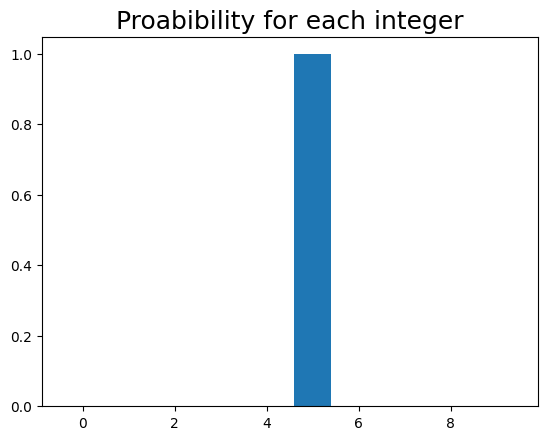

In [16]:
plt.bar(np.arange(0,10,1), model.predict(x_train[0][np.newaxis,:])[0])
plt.title ("Proabibility for each integer", fontsize = 18)
plt.show()

In [17]:
print(y_train[0])

5


## Custom Training Loop - Advanced (can be skipped)

In [18]:
input = tf.keras.layers.Input(shape = (28,28), name = 'Input_Layer')
layer = tf.keras.layers.Flatten()(input)
layer = tf.keras.layers.Dense(128, activation='relu')(layer)
layer = tf.keras.layers.Dropout(0.2)(layer)
layer = tf.keras.layers.Dense(10, activation='softmax')(layer)

model = tf.keras.models.Model(inputs=input, outputs=layer)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
batch_size = 32

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
val_dataset = val_dataset.batch(batch_size)

In [20]:
epochs = 5
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))


Start of epoch 0
Training loss (for one batch) at step 0: 2.3697
Seen so far: 32 samples


/Users/umbertomichelucci/envs/venv310/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Training loss (for one batch) at step 200: 2.2208
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 1.9777
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 1.8966
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 1.7937
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 1.7118
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 1.5969
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 1.4261
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 1.3438
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 1.1556
Seen so far: 57632 samples


2025-06-12 18:00:01.070397: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Start of epoch 1
Training loss (for one batch) at step 0: 1.2862
Seen so far: 32 samples
Training loss (for one batch) at step 200: 1.2773
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 0.9927
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 0.9832
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 1.1304
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 1.0611
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 0.8861
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 1.0018
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 0.9415
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 0.9658
Seen so far: 57632 samples


2025-06-12 18:00:09.071733: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Start of epoch 2
Training loss (for one batch) at step 0: 0.7364
Seen so far: 32 samples
Training loss (for one batch) at step 200: 0.9874
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 0.8426
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 1.2394
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 0.6984
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 1.1536
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 0.9682
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 0.5630
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 0.6608
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 0.6324
Seen so far: 57632 samples

Start of epoch 3
Training loss (for one batch) at step 0: 0.6761
Seen so far: 32 samples
Training loss (for one batch) at step 200: 0.5287
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 0.58

2025-06-12 18:00:24.733158: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Start of epoch 4
Training loss (for one batch) at step 0: 0.7428
Seen so far: 32 samples
Training loss (for one batch) at step 200: 0.3823
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 0.5786
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 0.5292
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 0.5913
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 0.8909
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 0.4778
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 0.6578
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 0.5869
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 0.7502
Seen so far: 57632 samples


In [21]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.8613 - loss: 0.5422


[0.4788905680179596, 0.8812000155448914]